Loading and preparing data...
Successfully loaded df_weather2.csv.
Data aggregated to daily level with all features:


,Site,net_qty,OrderQty,CanceledQty,MenuPrice,MenuSubsidy,tavg_C,prcp_mm,rain_flag,temp_dev,is_holiday,is_weekend,morning,afternoon,evening,MenuBase,SchoolID,hist_cancel_rate,daily_cancel_pct
DateOfService,,,,,,,,,,,,,,,,,,,
2020-01-02,BK,32,32,0,1.812500,1.687500,1.2,0.0,0,-2.957672,0,0,32,0,0,1,1,0.979676,0.0
2020-01-02,LP,169,169,0,2.832530,0.240964,0.3,0.0,0,-3.965782,1,1,100,59,7,1,2,1.049900,0.0
2020-01-03,BK,32,32,0,1.993750,1.506250,6.8,201.6,1,2.642328,0,0,32,0,0,1,1,0.979676,0.0
2020-01-03,LP,184,184,0,2.714088,0.334530,6.7,886.9,1,2.434218,1,1,91,84,6,1,2,1.049900,0.0
2020-01-04,LP,1,1,0,0.000000,3.500000,4.7,5.1,1,0.434218,0,0,1,0,0,1,1,1.049900,0.0



Performing EDA...


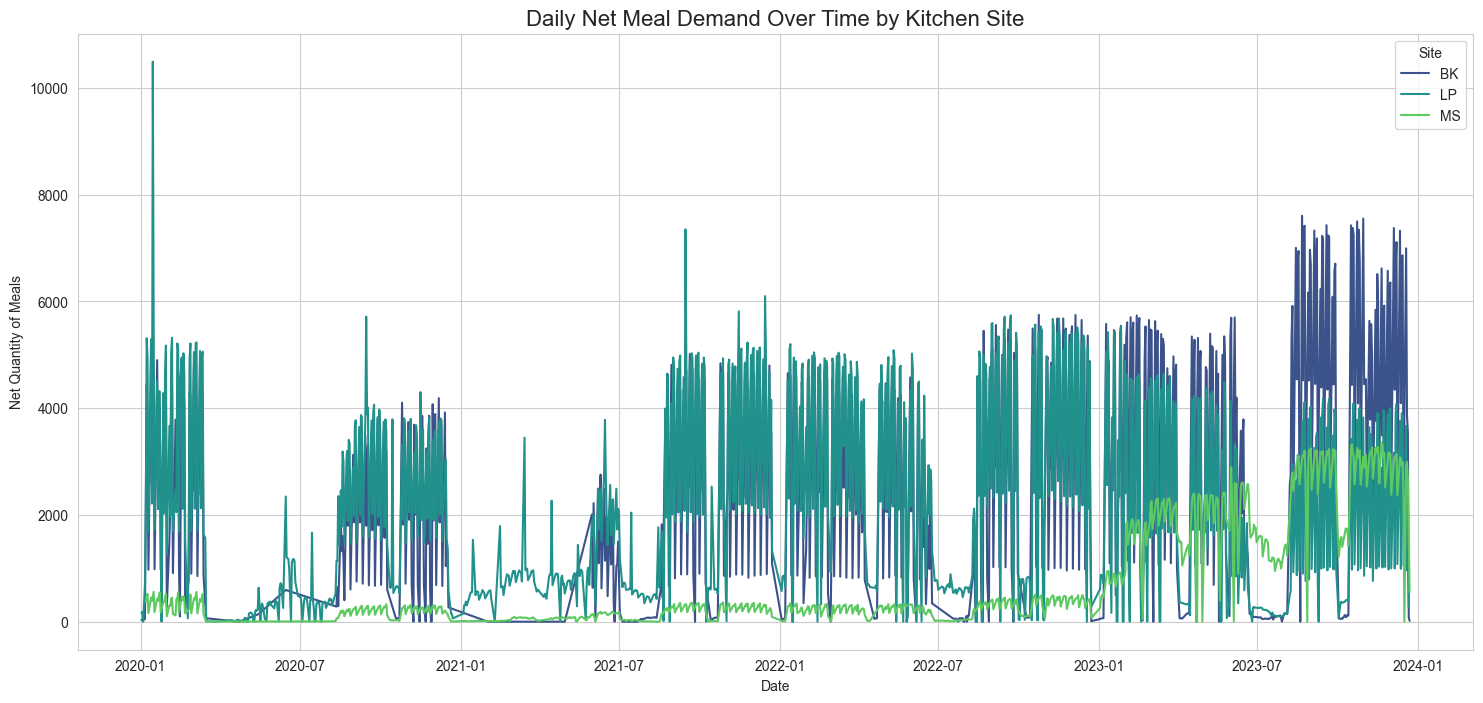

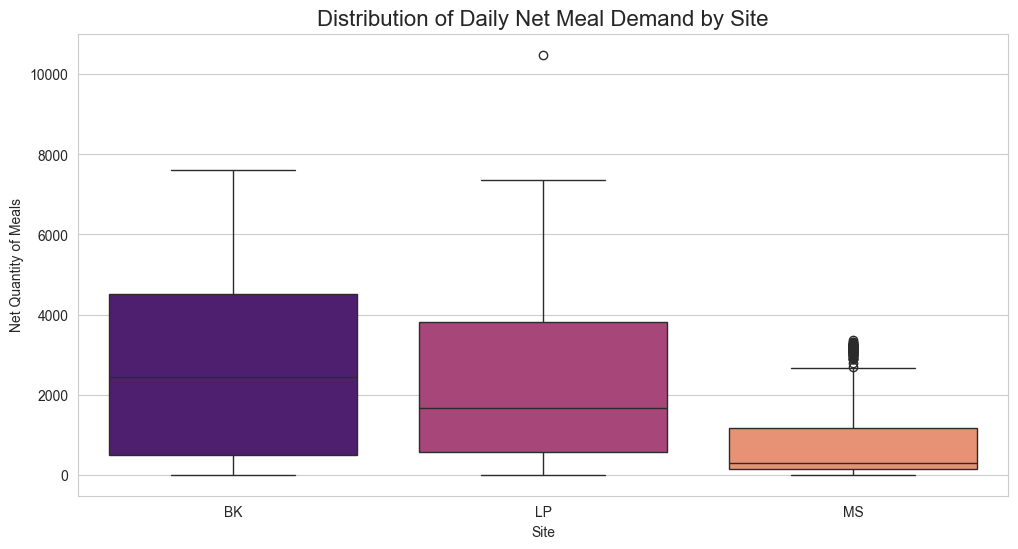


Engineering features for daily data...
Daily data with new features:


,Site,net_qty,OrderQty,CanceledQty,MenuPrice,MenuSubsidy,tavg_C,prcp_mm,rain_flag,temp_dev,...,year,week_of_year,quarter,lag_1_days,lag_2_days,lag_7_days,lag_14_days,lag_28_days,rolling_mean_7,rolling_std_7
DateOfService,,,,,,,,,,,,,,,,,,,,,
2020-02-07,LP,1689,1696,7,2.362910,0.880425,4.1,0.0,0,-1.203775,...,2020,6,1,5318.0,5053.0,4679.0,2109.0,169.0,3389.571429,1847.411149
2020-02-10,LP,2475,2505,30,2.907729,0.708611,7.2,55611.0,1,1.896225,...,2020,7,1,1689.0,5318.0,5172.0,4317.0,184.0,3094.428571,2161.757299
2020-02-11,BK,2222,2239,17,2.445047,1.045093,4.2,7959.6,1,-1.025646,...,2020,7,1,3784.0,910.0,275.0,4102.0,32.0,1773.428571,2020.913808
2020-02-11,LP,2051,2056,5,2.508041,0.780531,4.1,8208.0,1,-1.203775,...,2020,7,1,2475.0,1689.0,1287.0,4312.0,1.0,1367.285714,1371.015890
2020-02-12,BK,4202,4249,47,2.288726,0.882288,3.9,4248.0,0,-1.325646,...,2020,7,1,2222.0,3784.0,1534.0,3920.0,32.0,1620.000000,1337.016205



Checking for multicollinearity with VIF...
VIF Scores:


,feature,VIF
17,day_of_year,19766.542711
21,week_of_year,19331.953397
20,year,4007.299482
15,hist_cancel_rate,3106.639149
19,month,792.183066
0,OrderQty,215.961102
2,MenuPrice,157.782371
22,quarter,155.848415
10,morning,64.608182
11,afternoon,41.390418


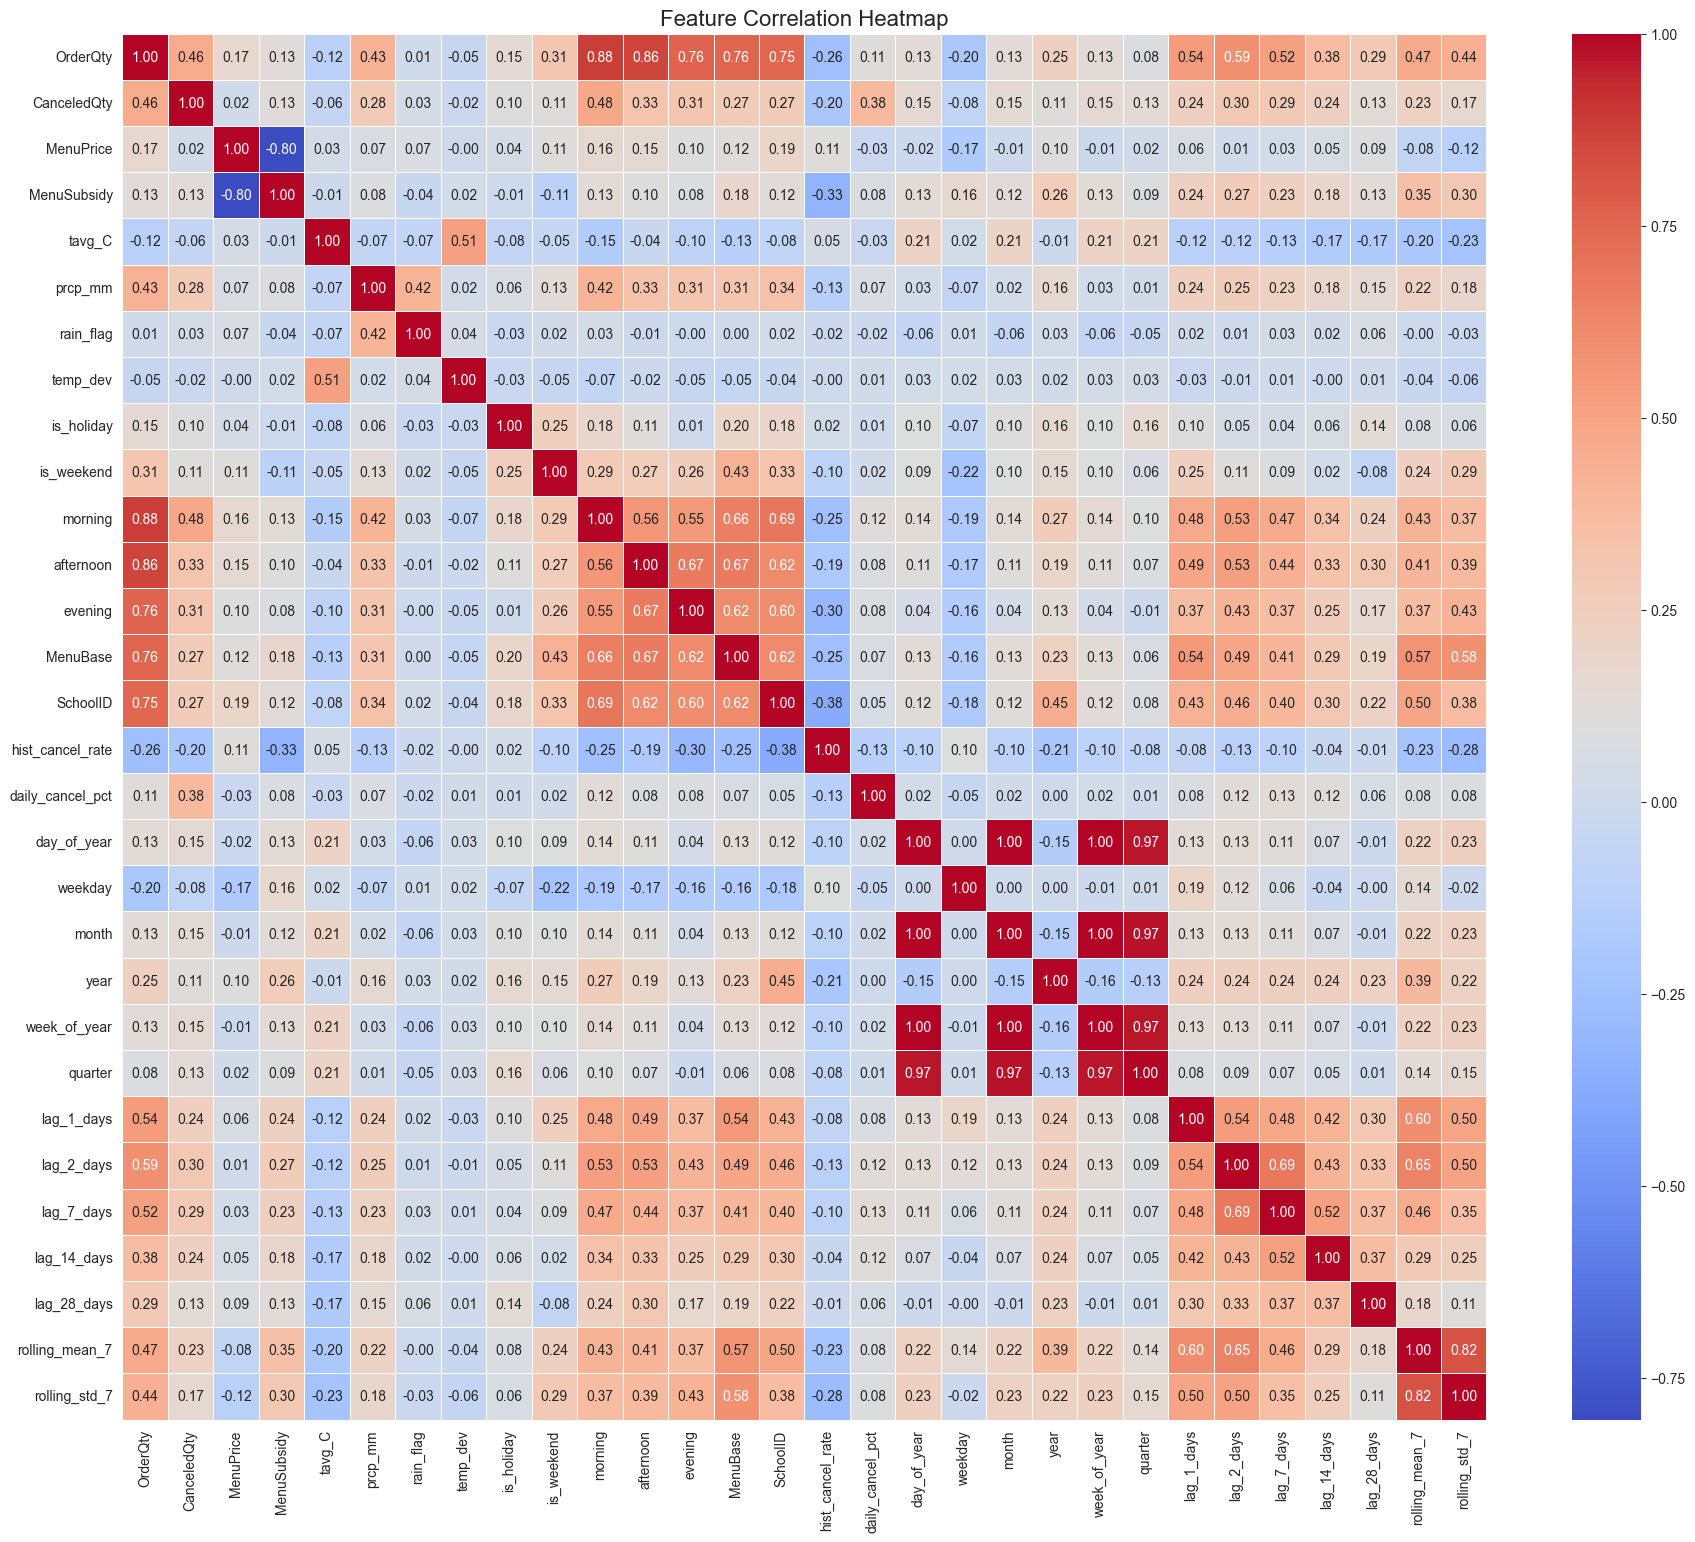


========================= Training for Site: LP =========================
Results -> Asymmetric Loss: 49.55 (+/- 23.06) | RMSE: 92.67 (+/- 57.63) meals


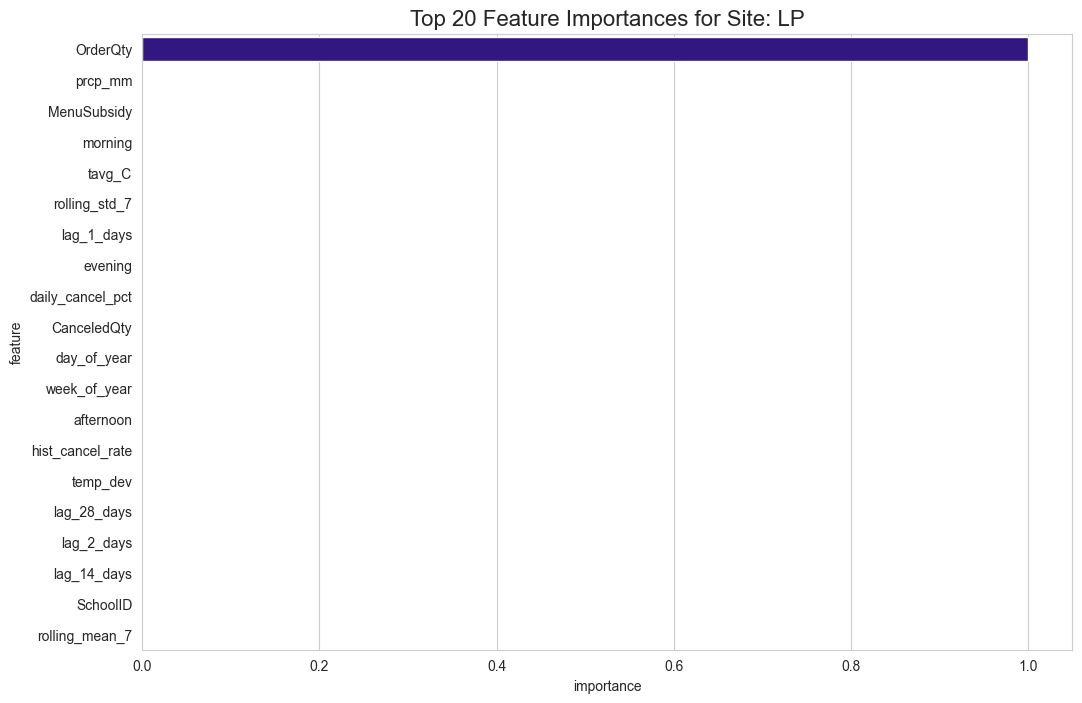

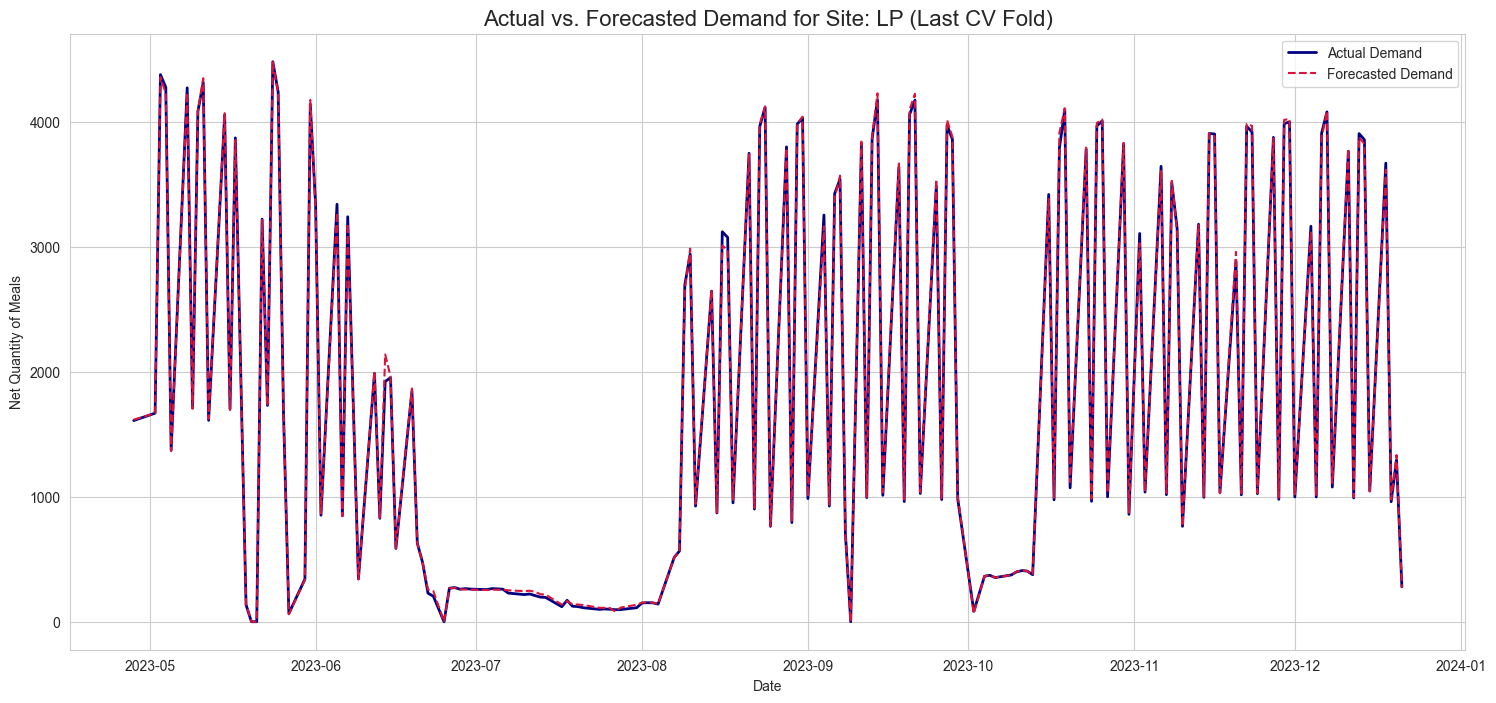


========================= Training for Site: BK =========================
Results -> Asymmetric Loss: 150.48 (+/- 153.31) | RMSE: 249.88 (+/- 263.50) meals


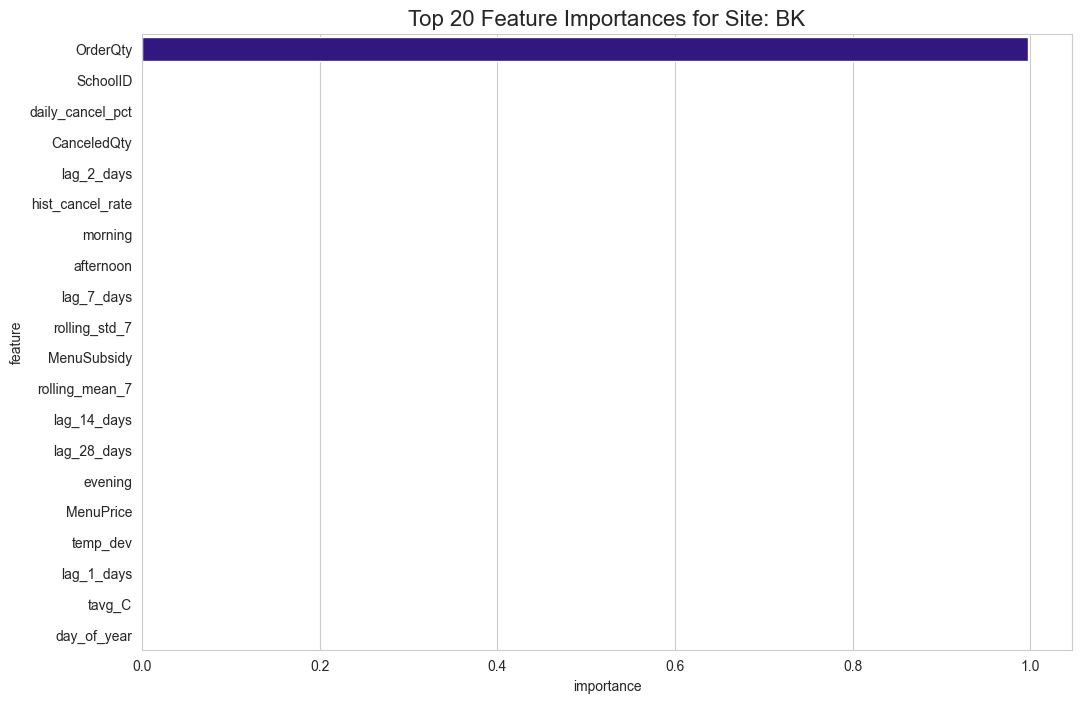

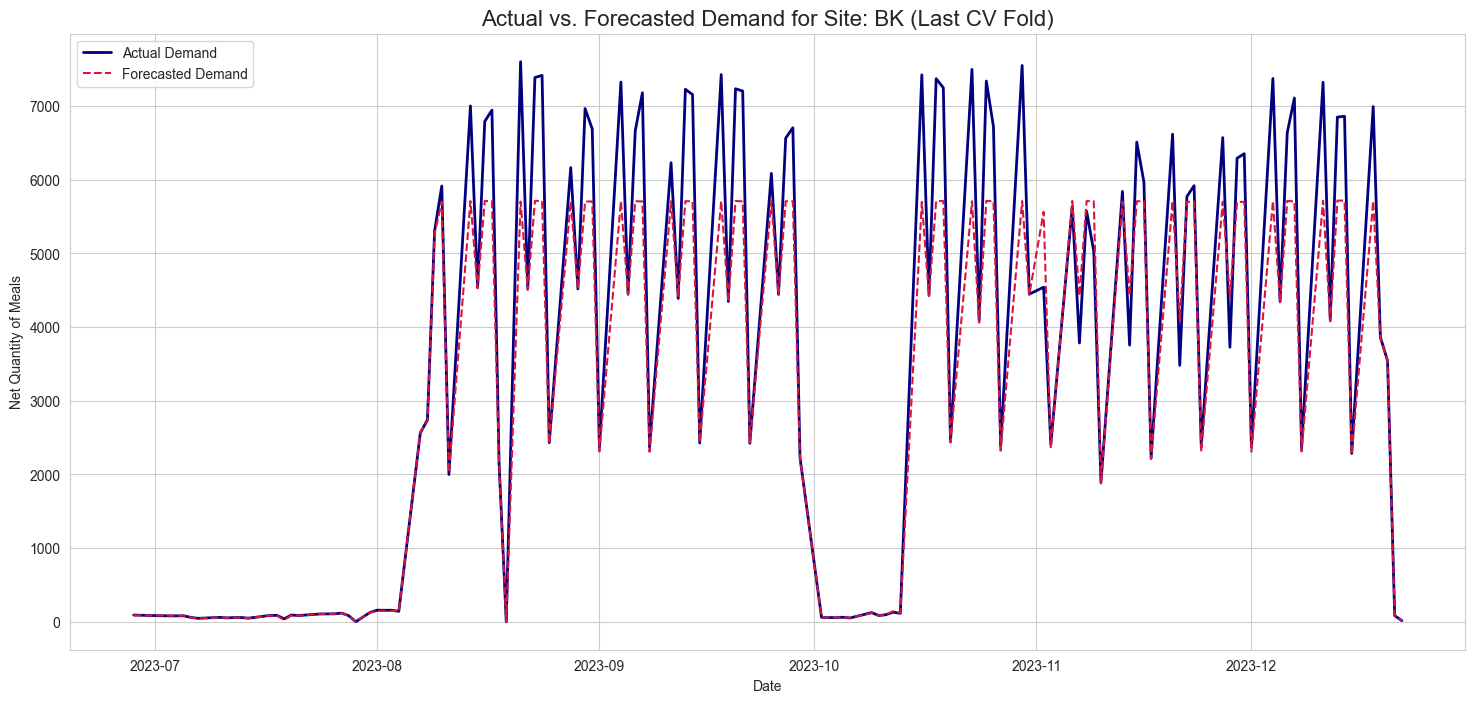


========================= Training for Site: MS =========================
Results -> Asymmetric Loss: 254.29 (+/- 381.11) | RMSE: 320.54 (+/- 477.07) meals


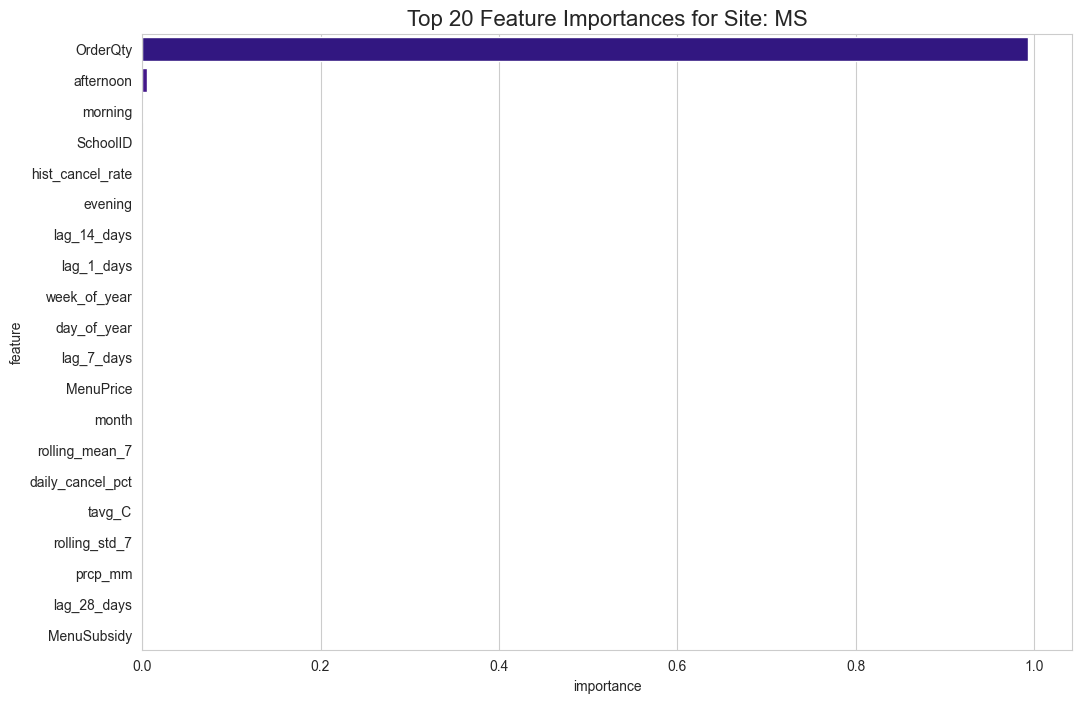

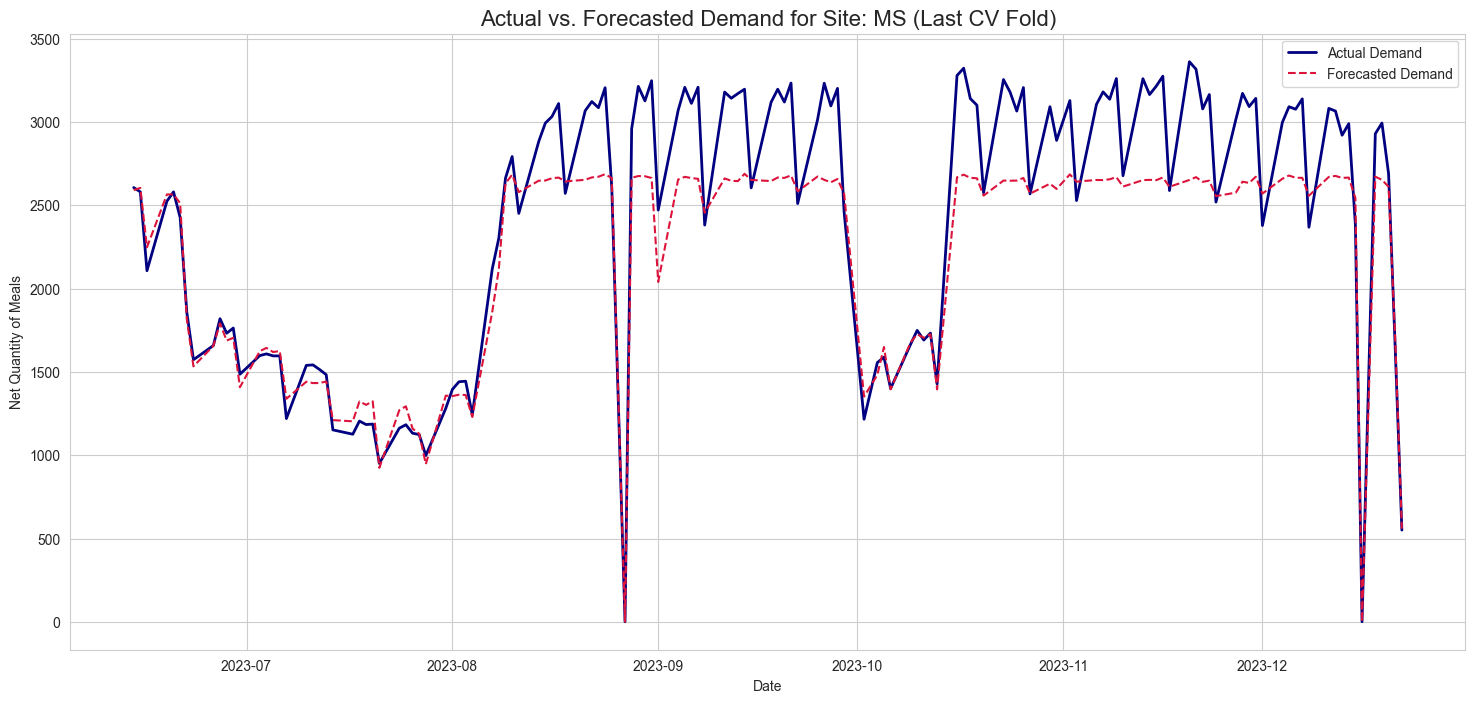


========================= FINAL MODEL PERFORMANCE SUMMARY =========================


,Asymmetric Loss,RMSE
LP,49.55 (+/- 23.06),92.67 (+/- 57.63)
BK,150.48 (+/- 153.31),249.88 (+/- 263.50)
MS,254.29 (+/- 381.11),320.54 (+/- 477.07)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')
# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 8)

# =============================================================================
# 1. DATA PREPARATION AND AGGREGATION
# =============================================================================
# This version uses your full, real dataset. The problem is converted from
# order-level classification to a daily-level regression forecast.

print("Loading and preparing data...")
try:
    # This now uses your real dataset. Ensure the path is correct.
    df = pd.read_csv('/Users/shayan/Desktop/IDS2/Stattkueche/df_weather2.csv', parse_dates=['DateOfService', 'DateOfOrder'])
    print("Successfully loaded df_weather2.csv.")
except FileNotFoundError:
    print("FATAL ERROR: df_weather2.csv not found. Please update the file path.")
    # The script will stop if the real data isn't found.
    exit()


# Calculate net quantity before aggregation
df['net_qty'] = df['OrderQty'] - df['CanceledQty']

# Define aggregation logic for all relevant columns from your dataset
agg_dict = {
    # Core Quantities
    'net_qty': 'sum',
    'OrderQty': 'sum',
    'CanceledQty': 'sum',
    # Price and Subsidy info
    'MenuPrice': 'mean',
    'MenuSubsidy': 'mean',
    # Weather info
    'tavg_C': 'mean',
    'prcp_mm': 'sum',
    'rain_flag': 'max',
    'temp_dev': 'mean',
    # Flags and categorical counts
    'is_holiday': 'max',
    'is_weekend': 'max',
    'morning': 'sum',
    'afternoon': 'sum',
    'evening': 'sum',
    'MenuBase': 'nunique', # Number of unique menus per day
    'SchoolID': 'nunique', # Number of unique schools served per day
    # Historical/Pre-calculated features
    'hist_cancel_rate': 'mean'
}

# Group by date and kitchen site
df_daily = df.groupby(['DateOfService', 'Site']).agg(agg_dict).reset_index()

# Create new daily-level features from aggregated data
# Handle potential division by zero
df_daily['daily_cancel_pct'] = (df_daily['CanceledQty'] / df_daily['OrderQty']).fillna(0)

# Sort and set index
df_daily = df_daily.sort_values('DateOfService').set_index('DateOfService')

print("Data aggregated to daily level with all features:")
display(df_daily.head())

# =============================================================================
# 2. EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION
# =============================================================================
print("\nPerforming EDA...")

# Plot 1: Daily Demand Over Time for Each Site
plt.figure(figsize=(18, 8))
sns.lineplot(data=df_daily, x=df_daily.index, y='net_qty', hue='Site', palette='viridis')
plt.title('Daily Net Meal Demand Over Time by Kitchen Site', fontsize=16)
plt.ylabel('Net Quantity of Meals')
plt.xlabel('Date')
plt.legend(title='Site')
plt.show()

# Plot 2: Distribution of Daily Demand
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_daily, x='Site', y='net_qty', palette='magma')
plt.title('Distribution of Daily Net Meal Demand by Site', fontsize=16)
plt.ylabel('Net Quantity of Meals')
plt.xlabel('Site')
plt.show()

# =============================================================================
# 3. FEATURE ENGINEERING FOR DAILY DATA
# =============================================================================
print("\nEngineering features for daily data...")
df_daily['day_of_year'] = df_daily.index.dayofyear
df_daily['weekday'] = df_daily.index.weekday
df_daily['month'] = df_daily.index.month
df_daily['year'] = df_daily.index.year
df_daily['week_of_year'] = df_daily.index.isocalendar().week.astype(int)
df_daily['quarter'] = df_daily.index.quarter

# Lag features (past demand)
for lag in [1, 2, 7, 14, 28]:
    df_daily[f'lag_{lag}_days'] = df_daily.groupby('Site')['net_qty'].shift(lag)

# Rolling window features (trends)
df_daily['rolling_mean_7'] = df_daily.groupby('Site')['net_qty'].shift(1).rolling(window=7, min_periods=1).mean()
df_daily['rolling_std_7'] = df_daily.groupby('Site')['net_qty'].shift(1).rolling(window=7, min_periods=1).std()

df_daily.dropna(inplace=True)
print("Daily data with new features:")
display(df_daily.head())

# =============================================================================
# 4. VIF CHECK & FEATURE CORRELATION
# =============================================================================
print("\nChecking for multicollinearity with VIF...")
numeric_features = df_daily.select_dtypes(include=np.number).drop(columns=['net_qty'])
vif_data = numeric_features.dropna()

vif_scores = pd.DataFrame()
vif_scores["feature"] = vif_data.columns
vif_scores["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print("VIF Scores:")
display(vif_scores.sort_values('VIF', ascending=False))

# Plot 3: Feature Correlation Heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(numeric_features.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

# =============================================================================
# 5. CUSTOM SCORER (ASYMMETRIC LOSS FUNCTION)
# =============================================================================
def asymmetric_loss(y_true, y_pred, under_penalty=1.2):
    error = y_true - y_pred
    loss = np.mean(np.where(error < 0, -error * under_penalty, error))
    return loss

asymmetric_scorer = make_scorer(asymmetric_loss, greater_is_better=False)

# =============================================================================
# 6. BASELINE REGRESSION MODEL TRAINING AND VISUALIZATION
# =============================================================================
sites = df_daily['Site'].unique()
all_scores = {}
models = {}

for site in sites:
    print(f"\n{'='*25} Training for Site: {site} {'='*25}")

    df_site = df_daily[df_daily['Site'] == site].copy()
    features = [col for col in df_site.columns if col not in ['net_qty', 'Site']]
    X = df_site[features]
    y = df_site['net_qty']

    if len(X) < 50:
        print(f"Skipping site {site} due to insufficient data.")
        continue

    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    tscv = TimeSeriesSplit(n_splits=5)

    # --- Evaluate Model ---
    custom_scores = -cross_val_score(model, X, y, cv=tscv, scoring=asymmetric_scorer, n_jobs=-1)
    rmse_scores = -cross_val_score(model, X, y, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)

    all_scores[site] = {
        'Asymmetric Loss': f"{custom_scores.mean():.2f} (+/- {custom_scores.std():.2f})",
        'RMSE': f"{rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})"
    }
    print(f"Results -> Asymmetric Loss: {all_scores[site]['Asymmetric Loss']} | RMSE: {all_scores[site]['RMSE']} meals")

    # --- Fit final model on all data for this site to get feature importances ---
    final_model = model.fit(X, y)
    models[site] = final_model

    # Plot 4: Feature Importance
    feat_importance = pd.DataFrame({'feature': X.columns, 'importance': final_model.feature_importances_})
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feat_importance.sort_values('importance', ascending=False).head(20), palette='plasma')
    plt.title(f'Top 20 Feature Importances for Site: {site}', fontsize=16)
    plt.show()

    # Plot 5: Actual vs. Predicted for the last CV fold
    train_indices, test_indices = list(tscv.split(X))[-1]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    vis_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train, y_train)
    predictions = vis_model.predict(X_test)

    plt.figure(figsize=(18, 8))
    plt.plot(y_test.index, y_test, label='Actual Demand', color='navy', lw=2)
    plt.plot(y_test.index, predictions, label='Forecasted Demand', color='crimson', linestyle='--')
    plt.title(f'Actual vs. Forecasted Demand for Site: {site} (Last CV Fold)', fontsize=16)
    plt.ylabel('Net Quantity of Meals')
    plt.xlabel('Date')
    plt.legend()
    plt.show()

# =============================================================================
# 7. FINAL SUMMARY
# =============================================================================
print(f"\n{'='*25} FINAL MODEL PERFORMANCE SUMMARY {'='*25}")
summary_df = pd.DataFrame(all_scores).T
display(summary_df)
